# Mushroom classification
In here we'll work on a mushroom classification gather from the [mushrooms dataser ]() and use sklear to work in a Decision Tree Classifier, having as an calasification vnariable whether the mushrooms is edible or not.

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing  
le = preprocessing.LabelEncoder()

# Data manipulation

## 1. Open file

In [3]:
file_path = "./csv/agaricus-lepiota2.data"
mushrooms = pd.read_csv(file_path, delimiter=",")

In [4]:
mushrooms.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mushrooms.shape

(8124, 23)

In [6]:
mushrooms.describe()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 2. Clean Data and Encoding

### 2.1 Cleaning NaN Values

In [7]:
for col in mushrooms.columns:
    print(col)

edible
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


In [8]:
# No NaN Values :D
mushrooms.isnull().any()

edible                      False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

### 2.2 Encoding
In this case our df is completely categorical so we need to encode each column 

In [9]:
encoding = "_en"
df = pd.DataFrame()
for col in mushrooms.columns:
    df[col + encoding] = le.fit_transform(mushrooms[col])


In [10]:
df.head()

,edible_en,cap-shape_en,cap-surface_en,cap-color_en,bruises_en,odor_en,gill-attachment_en,gill-spacing_en,gill-size_en,gill-color_en,...,stalk-surface-below-ring_en,stalk-color-above-ring_en,stalk-color-below-ring_en,veil-type_en,veil-color_en,ring-number_en,ring-type_en,spore-print-color_en,population_en,habitat_en
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## 3. Train and Test
Get our x and y values

In [11]:
# Get all columns except the classification value
features = []
for col in df.columns:
    features.append(col)
y_var = features.pop(0)

In [12]:
x = df[features]

In [13]:
x

,cap-shape_en,cap-surface_en,cap-color_en,bruises_en,odor_en,gill-attachment_en,gill-spacing_en,gill-size_en,gill-color_en,stalk-shape_en,...,stalk-surface-below-ring_en,stalk-color-above-ring_en,stalk-color-below-ring_en,veil-type_en,veil-color_en,ring-number_en,ring-type_en,spore-print-color_en,population_en,habitat_en
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [14]:
y=df[y_var]

In [15]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: edible_en, Length: 8124, dtype: int32

# Evolutionary Algorithm

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
# Decision tree
def get_model(trainX, trainY):
    x_train, x_test, y_train, y_test = train_test_split(trainX, trainY, test_size = 0.30 )
    mymodel= DecisionTreeClassifier()
    mymodel = mymodel.fit(x_train,y_train)
    #Predict the response for test dataset
    y_prediction = mymodel.predict(x_test)
    return accuracy_score(y_test, y_prediction) 
get_model(df[features],df[y_var])

1.0

In [17]:
# Individual initialization
def createIndividual(n): 
    return np.random.randint(0 , 2, n)
p = createIndividual(10)
print(p)

[1 0 0 1 1 1 0 0 1 1]


In [18]:
# Crossover operator
def combine(parentA, parentB, cRate):
  if (random.random() <= cRate):
    cPoint = np.random.randint(1, len(parentA))
    #print(cPoint)
    offspringA = np.append(parentA[0:cPoint], parentB[cPoint:])
    offspringB = np.append(parentB[0:cPoint], parentA[cPoint:])
  else:
    offspringA = np.copy(parentA)
    offspringB = np.copy(parentB)
  return offspringA, offspringB

p1 = createIndividual(10)
p2 = createIndividual(10)
print(p1)
print(p2)
o1, o2 = combine(p1, p2, 1.0)
print(o1)
print(o2)

[1 0 0 0 1 0 0 0 0 1]
[1 0 0 1 0 1 1 1 0 1]
[1 0 0 1 0 1 1 1 0 1]
[1 0 0 0 1 0 0 0 0 1]


In [19]:
# Mutation operator
def mutate(individual, mRate):
  for i in range(len(individual)):
    if (random.random() <= mRate):
      individual[i] = not(individual[i])
  return individual

p1 = createIndividual(10)
print(p1)
mutate(p1, 0.10)
print(p1)

[1 0 1 1 1 0 1 0 1 0]
[1 0 1 1 0 0 1 0 1 0]


In [20]:

def get_data(vectorSize, columns, calsificationVariable):
    myVector = createIndividual(vectorSize)
    global myFeatures
    myFeatures = [columns[i] for i in range(len(myVector)) if myVector[i] == 1]
    # Testing    
    newx = df[myFeatures]
    newy= df[calsificationVariable]
    return get_model(newx,newy)
a = get_data(len(features), features, y_var)
print(a)
print(myFeatures)

0.9991796554552912
['cap-shape_en', 'cap-color_en', 'bruises_en', 'odor_en', 'gill-spacing_en', 'gill-size_en', 'gill-color_en', 'stalk-shape_en', 'stalk-root_en', 'stalk-surface-below-ring_en', 'stalk-color-above-ring_en', 'stalk-color-below-ring_en', 'veil-color_en', 'ring-number_en', 'ring-type_en', 'population_en']


In [21]:
# Evaluation function
global features
global df, y_var
def evaluate(individual):
  return get_data(len(features), features, y_var)

In [22]:
# Tournament selection
def select(population, evaluation, tSize):
  winner = np.random.randint(0, len(population))
  for i in range(tSize - 1):
    rival = np.random.randint(0, len(population))
    if (evaluation[rival] > evaluation[winner]):
      winner = rival
  return population[winner]

In [23]:
# Genetic algorithm
def geneticAlgorithm(n, pSize, gens, cRate, mRate):
  # Creates the initial population
  population = [None] * pSize
  evaluation = [None] * pSize
  for i in range(pSize):
    population[i] = createIndividual(n)
    evaluation[i] = evaluate(population[i])
  # Keeps a record of the best individual found so far
  index = 0;
  for i in range(1, pSize):
    if (evaluation[i] > evaluation[index]):
      index = i;
  bestIndividual = population[index]
  bestEvaluation = evaluation[index]
  # Keeps the information for plotting the performance of the algorithm
  best = [0] * gens
  avg = [0] * gens
  # Runs the evolutionary process
  for i in range(gens):
    k = 0
    newPopulation = [None] * pSize
    # Crossover
    for j in range(pSize // 2):
      parentA = select(population, evaluation, 3)
      parentB = select(population, evaluation, 3)
      offspring1, offspring2 = combine(parentA, parentB, cRate)
      newPopulation[k] = offspring1
      newPopulation[k + 1] = offspring2
      k = k + 2
    population = newPopulation
    # Mutation
    for j in range(pSize):
      population[j] = mutate(population[j], mRate)
      evaluation[j] = evaluate(population[j])
      # Keeps a record of the best individual found so far
      if (evaluation[j] > bestEvaluation):
        bestEvaluation = evaluation[j]
        bestIndividual = population[j]
      best[i] = bestEvaluation
      avg[i] = np.average(evaluation)
  matplotlib.pyplot.plot(range(gens), best, label = "Best")
  matplotlib.pyplot.plot(range(gens), avg, label = "Average")
  matplotlib.pyplot.legend()
  matplotlib.pyplot.title("GA Run")
  matplotlib.pyplot.show()
  # Returns the best individual found so far
  return bestIndividual, bestEvaluation   

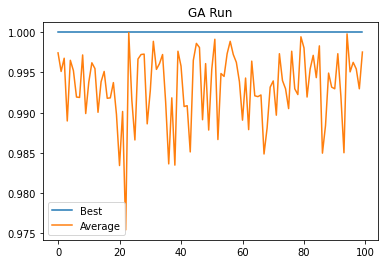

In [24]:
global features
global df, y_var
bestIndividual, bestEvaluation = geneticAlgorithm(len(features), 8, 100, 1, 0.01)
bestFeatures = [features[i] for i in range(len(bestIndividual)) if bestIndividual[i] == 1]


In [25]:
print(bestIndividual, bestEvaluation)
print(bestFeatures)
# print(features)

[0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0] 1.0
['cap-color_en', 'bruises_en', 'gill-color_en', 'stalk-shape_en', 'stalk-root_en', 'stalk-surface-above-ring_en', 'stalk-surface-below-ring_en', 'stalk-color-below-ring_en', 'veil-type_en', 'ring-number_en', 'spore-print-color_en']
